In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Sources:   
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html
- https://realpython.com/linear-regression-in-python/
- https://www.geeksforgeeks.org/python-pandas-dataframe-pct_change/

In [186]:
def dataframe(country):
    country = country.capitalize()
    df = pd.read_csv("./source_data/owid-covid-data.csv")
    df['date'] = pd.to_datetime(df['date'])
    df_country = df.loc[(df["location"]==country)]
    df_country[["reproduction_rate","stringency_index","total_cases","people_fully_vaccinated"]] = df_country[["reproduction_rate","stringency_index","total_cases","people_fully_vaccinated"]].fillna(method="ffill")
    df_country[["reproduction_rate","stringency_index","total_cases","people_fully_vaccinated"]] = df_country[["reproduction_rate","stringency_index","total_cases","people_fully_vaccinated"]].fillna(value=0)
    df_country["total_cases_pct"] = df_country["total_cases"].pct_change()
    df_country["vaccination_rate"] = df_country["people_fully_vaccinated"]/df_country["population"]*100
    df_country = df_country.loc[(df_country["people_fully_vaccinated"] >0)]
    return df_country

C:\Users\Enzo\anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-186-0d321c2ab643>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country["total_cases_pct"] = df_country["total_cases"].pct_change()
<ipython-input-186-0d321c2ab643>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

      ----- CORRELATION COEFFICIENT -----

                  stringency_index  total_cases_pct
stringency_index          1.000000         0.655108
total_cases_pct           0.655108         1.000000
------------------------------------------------
                  vaccination_rate  total_cases_pct
vaccination_rate          1.000000        -0.495219
total_cases_pct          -0.495219         1.000000

      ----- GRAPH: CORRELATION COEFFICIENT -----



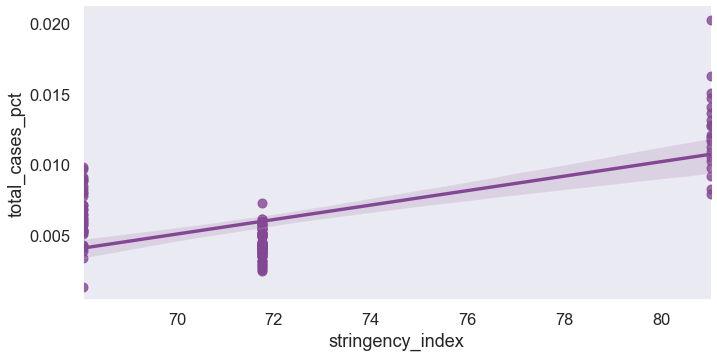

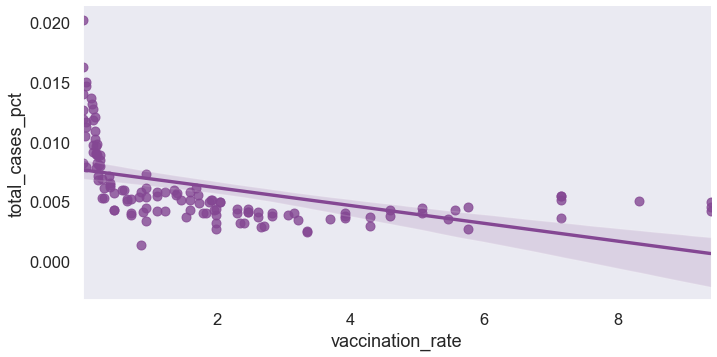

In [187]:
df_country = dataframe("philippines")
print("      ----- CORRELATION COEFFICIENT -----\n")
correlation_test1=df_country.filter(['stringency_index', 'total_cases_pct'], axis=1)
print(correlation_test1.corr(method='pearson'))
print("------------------------------------------------")
correlation_test2=df_country.filter(['vaccination_rate', 'total_cases_pct'], axis=1)
print(correlation_test2.corr(method='pearson'))

print("\n      ----- GRAPH: CORRELATION COEFFICIENT -----\n")
import seaborn as sns
sns.set_style('dark')
sns.set_context("talk")
sns.set_palette('PRGn')
#f, ax = plt.subplots(figsize=(20, 10))
sns.lmplot(x="stringency_index", y="total_cases_pct", data=df_country, aspect=2);
sns.lmplot(x="vaccination_rate", y="total_cases_pct", data=df_country, aspect=2);
#sns.regplot(y="new_cases", x="stringency_index", data=df_philippines);